In [1]:
from netCDF4 import Dataset

import glob

import numpy as np
from time import sleep
from matplotlib import pyplot as plt
from IPython import display

In [2]:
%matplotlib inline
plt.ioff()

In [3]:
cmct_dir = 'data/GLAS_Data/2005'
cmct_files = glob.glob(cmct_dir + '/*final.nc')

In [4]:
zoom_bounds = None
zoom_bounds = [310, 320, 75, 80]
#zoom_bounds = [312.0, 312.1, 78.05, 78.10]

In [5]:
fig_diff, ax_diff = plt.subplots()

In [6]:
# %matplotlib widget

def create_coords(files):
    LON_DEGE = list()
    LAT_DEGN = list()
    WGS84ELEV_M = list()
    DEM_M  = list()
    for i_file, cmct_file in enumerate(files):
    #     print('plotting file {:4d} / {:4d}: {:s}'.format(i_file, len(cmct_files), cmct_file))
        ncfile = Dataset(cmct_file, 'r')
    
        if zoom_bounds:
            idx = (ncfile['LON_DEGE'][:] > zoom_bounds[0]) & (ncfile['LON_DEGE'][:] < zoom_bounds[1]) & \
                  (ncfile['LAT_DEGN'][:] > zoom_bounds[2]) & (ncfile['LAT_DEGN'][:] < zoom_bounds[3])
        else:
            idx = np.arange(len(ncfile['LON_DEGE'][:]))
    
        if np.sum(idx) > 0:
            LON_DEGE.extend(ncfile['LON_DEGE'][idx])
            LAT_DEGN.extend(ncfile['LAT_DEGN'][idx])
            WGS84ELEV_M.extend(ncfile['WGS84ELEV_M'][idx])
            DEM_M.extend(ncfile['DEM_M'][idx])
            #for i in np.where(idx)[0]:
            #    print('{:5.0f} {:5.0f} {:5.0f}'.format(ncfile['WGS84ELEV_M'][i], ncfile['DEM_M'][i], ncfile['WGS84ELEV_M'][i]-ncfile['DEM_M'][i]))
    
    LON_DEGE = np.array(LON_DEGE)
    LAT_DEGN = np.array(LAT_DEGN)
    WGS84ELEV_M = np.array(WGS84ELEV_M)
    DEM_M = np.array(DEM_M)
    
#     ax_height = fig_height.subplots()
#     ax_diff = fig_diff.subplots()
#     ax_dem = fig_dem.subplots()

    sc_diff   = ax_diff.scatter(  LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M-DEM_M, cmap='coolwarm', vmin=-100, vmax=+100)
    fig_diff.colorbar(sc_diff)

In [7]:
# This a for loop. Range of 5 (starting at "0"). File names are printed and plotted on the graph. 

Processing files: 0 to 5
data/GLAS_Data/2005/GLA12_634_2111_003_0029_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0071_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_003_0281_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_002_0323_0_01_0001.CMCT.final.nc
data/GLAS_Data/2005/GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc


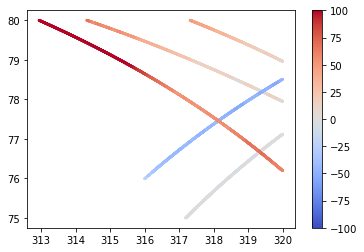

In [9]:
# %matplotlib widget

fig_diff, ax_diff = plt.subplots()

for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*5 - 5
    ub = i*5
    
    print(f'Processing files: {lb} to {ub}')
    print(*cmct_files[lb:ub], sep = "\n")

    create_coords(cmct_files[lb:ub])
    
    plt.show()
    sleep(1)
    fig_diff.clear()
    break

In [ ]:
# Range 45-5

#2113_002_0351 Notes: Two tracks that cross each other. One blue and the other is dark red to orange. 
    # 002_0351: Over 75 meters difference. 
    # 

In [ ]:
# Range 40-5

# 2111_003_0309 Notes: A long light orange track. This changes, moves to upper corner as two more track appear with the next file plot.
# 2111_002_1317 Notes: Two lines appeared a orange/blue track and a red/orange track. 
#     002_1317: They intersect with each other at a 50+ meter difference. 
# 2111_003_0197 Notes: Two more tracks appear. One is a light blue and the other is a orange track. There are are few intersections. 
#     003_0197: They both cross each other. 25 metter difference. 
#     003_0197 x 002_1317: the light blue track and the red/orange track. And the orange track and with the red/orange track of 1317 again.
#         There is another cross as well with those two files. 
# 2113_002_0407 Notes: Nothing appears so might be out of bounds. 
# 2111_002_0183 Notes: Lower right of the plot. No intersections, mostly out of bounds. 

In [39]:
# Range 35-5

# 2113_002_0155 Notes: Nothing appears on the plot. Out of boundary. 
# 2111_001_1345 Notes: One blue track. 
# 2113_001_1289 Notes: One orange track. 
# 2111_002_0197 Notes: Two tracks appeared. A light blue one and a orange to red track. 
    # 002_0197 x 001_1345: The blue track and the orange/red track. Over 100 meter difference. 
# 2111_002_0407 Notes: Out of boundary. 

In [ ]:
# Range 30-5

# 2111_002_0393 Notes: One long light blue/gray track. This goes to the corner as more files are plotted. 
# 2113_001_1345 Notes: One track, a orange/blue track. 
# 2111_002_0071 Notes: One track that intersects with another track. This track is orange. 
    # 002_0071 x 001_1345: Over a 50 meter difference. 
# 2113_002_0239 Notes: Two more tracks appear. One is a grayish color and the other is a mostly blue track. There are two tracks from this. 
    # 002_0239: Both of the tracks intersect with each other. There is 25+ meter error within. 
    # 002_0239 x 001_1345: Also a 25+ meter difference. 
# 2111_003_0337: Two more tracks appeared. There are three intersections with this file. A orange/blue track and an orange/red track. 
    # 003_0337: The two tracks cross with each other. More then 25+ difference. 
    # 003_0337 x 002_0239: The orange/blue track and the gray track cross each other. They have less of an error then the other intersections.
        # Maybe a 5-10 meter error
    # 003_0337 x 002_0071: The orange/blue track intersects with the orange track. 10-25 meter difference. 

In [ ]:
# Range 25-5

# 2111_003_0323 Notes: Two tracks. One is bottom left and is gray/white (0 meters) and the other one consists of red and light orange.
    # They might intersect outside of the boundaries. 
# 2111_003_0211 Notes: One blue/orange track that crosses into the red/orange track of #2111_003_0323
    # 003_0211 x #003_0323: light blue crosses the red/orange track. Around 25+ meter difference. 
# 2111_002_0211 Notes: Nothing shows up on the plot. Might be covering the 2111_003_0211 tracks. Will keep not of this. 
# 2111_002_0351 Notes: Two more tracks appeared with this file. An orange/light blue track and a dark red/orange track. There are some intersections. 
    # 002_0351: Intersection of the two tracks. Over 75+ meter difference. 
    # 002_0351 x 003_0323: The orange/blue track crosses with the red/light orange track. At the intersection, it would be over 50+ meters difference. 
# 2111_002_0099 Notes: A orange/red track that crosses over three other tracks. 
    # 002_0099 x 002_0351: Crosses with the orange/blue track. A large error, over 50 meters. 
    # 002_0099 x 003_0211: Crosses with the blue/orange track. Another large margin of error. 
    # 002_0099 x 003_0323: Crosses over with the gray track. Another large distance between them. 

In [12]:
# 001_1317 Notes: Intersection difference is more then 50 meters. Colors are light blue and orange/red. 
# 002_0323 Notes: Light gray/white line that intersects with the orange/red 001_1317 track. Also more then 50 meters difference as well. 
# 003_0281 Notes: Does not even show up on the plot. No seen interaction with the tracks. Could be cloud coverage. 
# 003_0071 Notes: Intersection with light blue track of 001_1317. This track is a grayish/tan tone. Most likely around 10-20 meter difference. 
# 003_0029 Notes: Does not show up on the plots. 

#This range was lb = i*5 - 5 and ub = i*5

In [11]:
# 002_0141 Notes: Only one blue line. It slightly disappears in is a few small spots (Possibly cloud coverage). Overall it looks be consisent with 0 to -50 meters. 
# 001_1303 Notes: A three tracks on the plot. Light gray (bottom right), tan (upper right), and light blue (upper left). 
# 002_0127 Notes: Two more tracks appear that breifly intersect. The tanish one is around 10-15 meters while the light blue/gray is around -5 meters. So there is a 15 to 20 meter difference.
# 002_295 Notes: There doesn't seem to be any tracks that appear. Outside of boundaries maybe. 
# 002_0113 Notes: Dark red to orange track. There is a lighter blue track that appears and turns tan/orange as it gets closer to the red track. This blue track might be 002_0141 track that is altered as more data is added. 
        # Intersection: Dark Red is around 80 meters. Blue track is around -10 meters. So there is probably a 90 meters difference. 

# This range was lb = i*10 -5 and ub = i*1

In [10]:
# 002_0309 Notes: One long line. Around 10-20 meters. No other tracks. It disappears when other files are implimented into the loop. 
    # This is at i*15-1. 
# 003_0001 Notes: Three tracks show up, there is a intersection. Upper tan track is between 10-25 meters. The intersection is a blue track and a gray-ish tan color.
    # Blue Track: -30 meters
    # Gray-ish Tan Track: 5 meters
    # Total Distance: 35 meters
# 002_0211 Notes: A new track appears. And there seems to be a brief dotted section that is deep blue, -80 to -90. That section is probably part of the new track. 
    # Upper section of track is blue then it slowly changes to the gray-ish tan color at the intersection with 003_0001.
    # Intersection of 002_0211 & 003_0001 looks to be under (1 meter) since it is very similar color scheme. 
# 003_0127 Notes: Two more tracks appeared. A lighter blue track next to the blue track of 003_0001. 
    # Blue Track: -5 to -10 meters. This track crosses with two tracks: 
        # 003_0001, Grayish-tan Track: There is a distance of 10 to 15 meters between them.  
    # Tan/Orange: Two intersections
        # Crosses with the Blue track of this file. 
            # Tan/orange: 30 meters so it is 35 to 40 meter difference
        # Crosses the 002_0211 blue/tan track

In [ ]:
# Range 20-5

# data/GLAS_Data/2005/GLA12_634_2113_002_0365_0_01_0001.CMCT.final.nc
# data/GLAS_Data/2005/GLA12_634_2111_002_0155_0_01_0001.CMCT.final.nc
# data/GLAS_Data/2005/GLA12_634_2111_001_1247_0_01_0001.CMCT.final.nc
# data/GLAS_Data/2005/GLA12_634_2113_002_0141_0_01_0001.CMCT.final.nc
# data/GLAS_Data/2005/GLA12_634_2113_002_0015_0_01_0001.CMCT.final.nc

#2113_002_0015 Notes: Two tracks. One is around 0 m and the other one is a blue track. 